In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
dataset=pd.read_csv('50_Startups.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

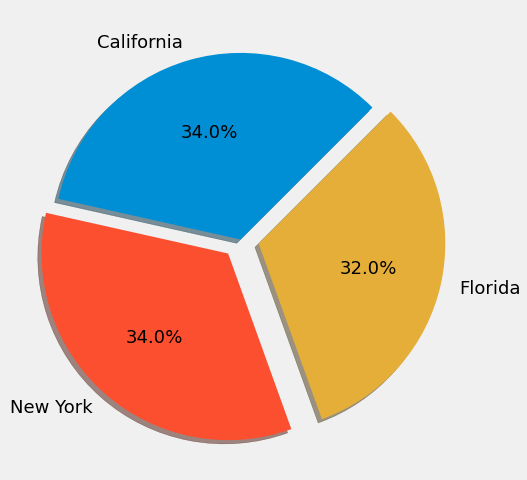

In [19]:
plt.style.use("fivethirtyeight")
frequency=pd.DataFrame(x[:,-1]).value_counts()
plt.figure(figsize=[14,8])
labesl=['California','New York','Florida']
sizes = [15, 30, 45]
plt.pie(frequency,explode=(0, 0.1, .1),labels=labesl,autopct='%1.1f%%',startangle=45,textprops={'fontsize': 18},shadow=True)
plt.show()

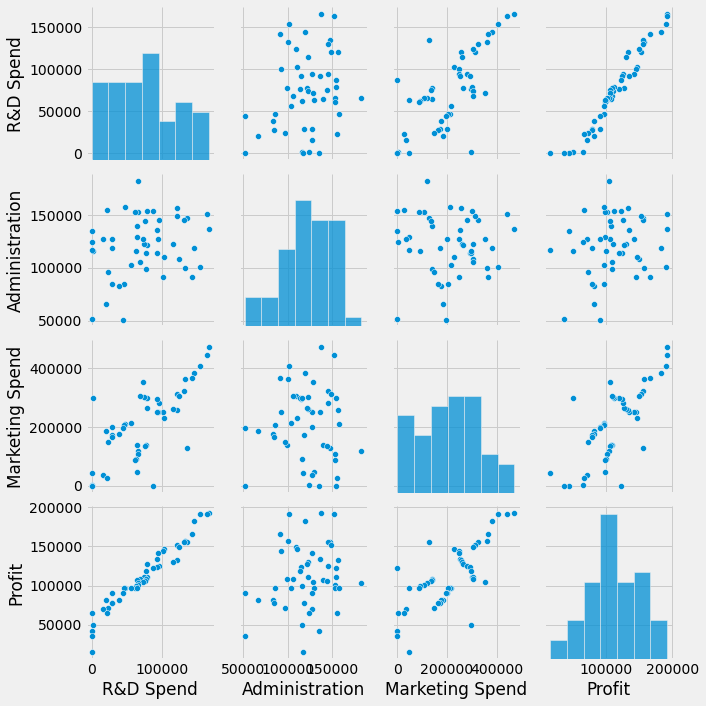

In [20]:
sns.pairplot(dataset)

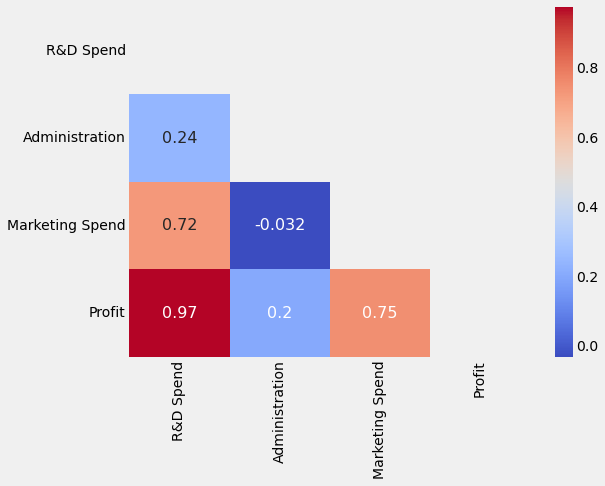

In [21]:
clip=np.zeros_like(dataset.corr())
tria=np.triu_indices_from(clip)
clip[tria]=True
plt.style.use("fivethirtyeight")
plt.figure(figsize=[8,6])
sns.heatmap(dataset.corr(),mask=clip,annot=True,cmap=cm.coolwarm,annot_kws={'fontsize': 16})
plt.show()

## Processing Data

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=ct.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
import statsmodels.api as sm

In [40]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5
0,0.0,1.0,0.0,55493.95,103057.49,214634.81
1,0.0,0.0,1.0,46014.02,85047.44,205517.64
2,0.0,1.0,0.0,75328.87,144135.98,134050.07
3,1.0,0.0,0.0,46426.07,157693.92,210797.67
4,0.0,1.0,0.0,91749.16,114175.79,294919.57


In [41]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [24]:
model=sm.OLS(y_train.astype(float),x_train.astype(float))
res=model.fit()

In [25]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           3.91e-21
Time:                        15:15:49   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.255e+04   8358.538      5.091      0.0

In [26]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# MultiLinear regression with sklearn

In [27]:
regr=LinearRegression()

In [28]:
results=regr.fit(x_train,y_train)

In [29]:
results.score(x_test,y_test)*100

93.47068473282303

In [30]:
fitted_val=results.predict(x_test)
resid=y_test-fitted_val

In [31]:
eval_vec=pd.DataFrame(fitted_val[:10],columns=['Predicted'])
eval_vec["Real values"]=pd.DataFrame(y_test[:10],columns=['Real values'])
eval_vec['difference']=pd.DataFrame(resid)

In [34]:
eval_vec.round(1)

,Predicted,Real values,difference
0,103015.2,103282.4,267.2
1,132582.3,144259.4,11677.1
2,132447.7,146122.0,13674.2
3,71976.1,77798.8,5822.7
4,178537.5,191050.4,12512.9
5,116161.2,105008.3,-11152.9
6,67851.7,81229.1,13377.4
7,98791.7,97483.6,-1308.2
8,113969.4,110352.2,-3617.2
9,167921.1,166187.9,-1733.1
